In [39]:
# laod data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
# sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [40]:
heartdisease_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [41]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)



In [42]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_pca = PCA(n_components=2).fit_transform(X_std)




# 1.
#### Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.

In [43]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
for eps in range(1, 10):
    for min_sample in range(1,10):
    
        dbscan_cluster = DBSCAN(eps=eps, min_samples=min_sample)

        # Fit model
        clusters = dbscan_cluster.fit_predict(X_std)

        if -1 in np.unique(clusters):
            num_cluster = len(np.unique(clusters))-1
        else: 
            num_cluster = len(np.unique(clusters))
        print("eps = {}, min_sample = {}, num_cluster = {}".format(eps, min_sample, num_cluster))


eps = 1, min_sample = 1, num_cluster = 294
eps = 1, min_sample = 2, num_cluster = 8
eps = 1, min_sample = 3, num_cluster = 1
eps = 1, min_sample = 4, num_cluster = 0
eps = 1, min_sample = 5, num_cluster = 0
eps = 1, min_sample = 6, num_cluster = 0
eps = 1, min_sample = 7, num_cluster = 0
eps = 1, min_sample = 8, num_cluster = 0
eps = 1, min_sample = 9, num_cluster = 0
eps = 2, min_sample = 1, num_cluster = 178
eps = 2, min_sample = 2, num_cluster = 30
eps = 2, min_sample = 3, num_cluster = 14
eps = 2, min_sample = 4, num_cluster = 8
eps = 2, min_sample = 5, num_cluster = 7
eps = 2, min_sample = 6, num_cluster = 5
eps = 2, min_sample = 7, num_cluster = 5
eps = 2, min_sample = 8, num_cluster = 3
eps = 2, min_sample = 9, num_cluster = 3
eps = 3, min_sample = 1, num_cluster = 34
eps = 3, min_sample = 2, num_cluster = 8
eps = 3, min_sample = 3, num_cluster = 5
eps = 3, min_sample = 4, num_cluster = 3
eps = 3, min_sample = 5, num_cluster = 5
eps = 3, min_sample = 6, num_cluster = 2
eps = 3, 

epi = 3, min_sample = 6, num_cluster = 2


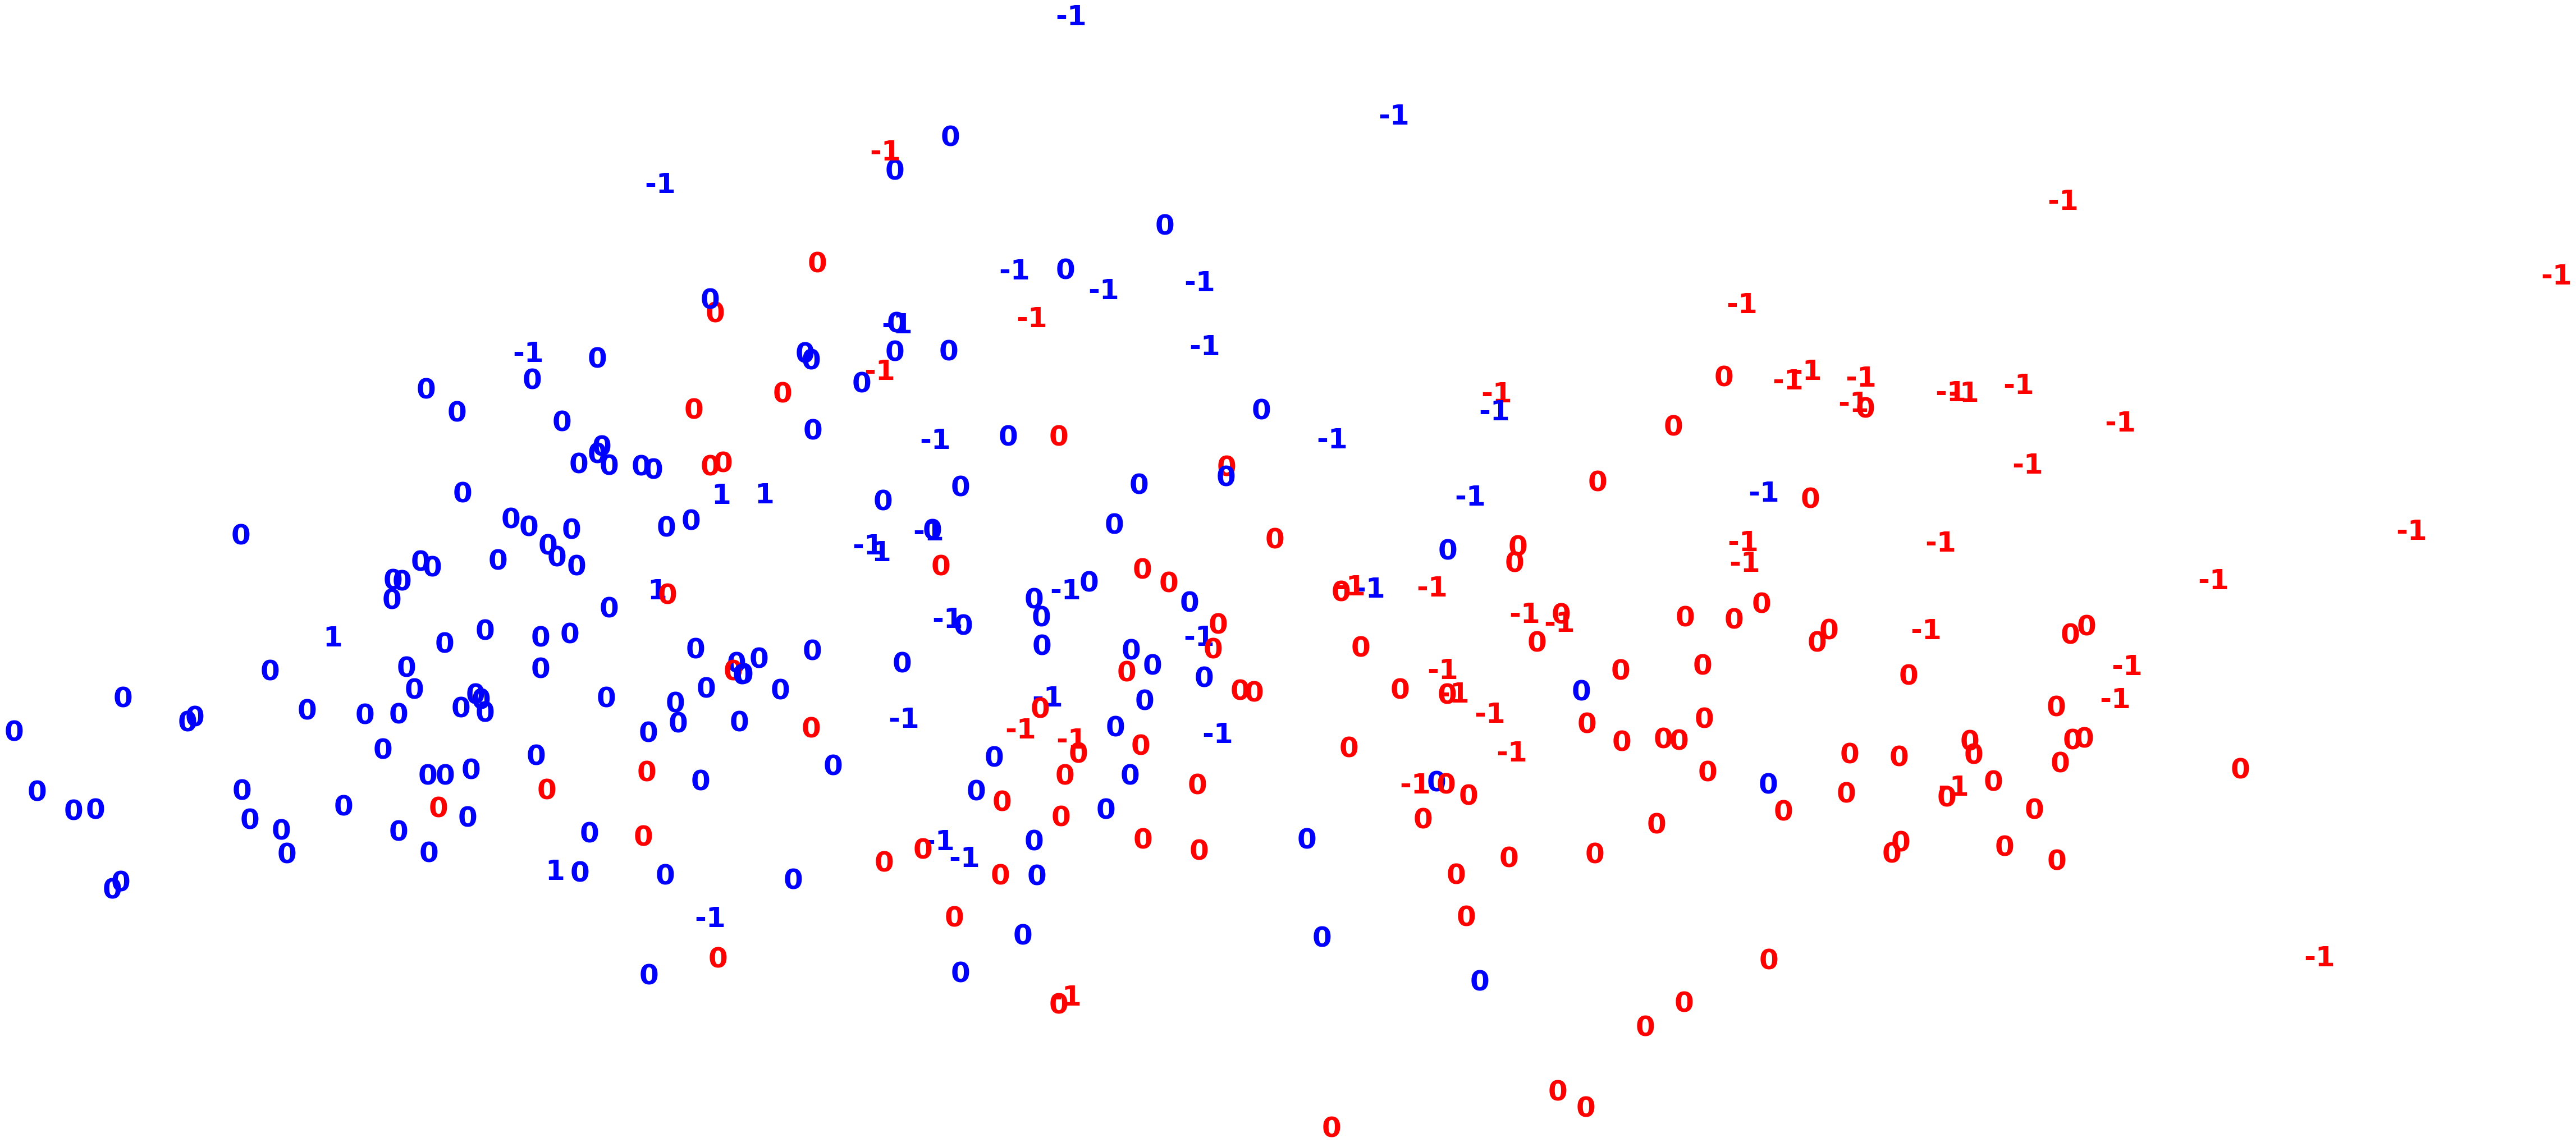

In [44]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
for eps in [3]:
    for min_sample in [6]:
    
        dbscan_cluster = DBSCAN(eps=eps, min_samples=min_sample)

        # Fit model
        clusters = dbscan_cluster.fit_predict(X_std)

        pca = PCA(n_components=2).fit_transform(X_std)

        plt.figure(figsize=(10,5))
        colours = 'rbgcmyk'
        for i in range(pca.shape[0]):
            plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
                     color=colours[y[i]],
                     fontdict={'weight': 'bold', 'size': 50}
                )

        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        
        if -1 in np.unique(clusters):
            num_cluster = len(np.unique(clusters))-1
        else: 
            num_cluster = len(np.unique(clusters))
        print("epi = {}, min_sample = {}, num_cluster = {}".format(eps, min_sample, num_cluster))
        plt.show()

#### It is very hard to get exactely two clusters, assuming outliers do not count. Even we can make the clusters number as two, the result is not consistent with the ground truth.

# 2. 
#### Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

In [45]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
for eps in [1]:
    for min_sample in range(1,20):
    
        dbscan_cluster = DBSCAN(eps=eps, min_samples=min_sample, metric='euclidean')

        # Fit model
        clusters = dbscan_cluster.fit_predict(X_std)

        if -1 in np.unique(clusters):
            num_cluster = len(np.unique(clusters))-1
        else: 
            num_cluster = len(np.unique(clusters))
        print("eps = {}, min_sample = {}, num_cluster = {}".format(eps, min_sample, num_cluster))


eps = 1, min_sample = 1, num_cluster = 294
eps = 1, min_sample = 2, num_cluster = 8
eps = 1, min_sample = 3, num_cluster = 1
eps = 1, min_sample = 4, num_cluster = 0
eps = 1, min_sample = 5, num_cluster = 0
eps = 1, min_sample = 6, num_cluster = 0
eps = 1, min_sample = 7, num_cluster = 0
eps = 1, min_sample = 8, num_cluster = 0
eps = 1, min_sample = 9, num_cluster = 0
eps = 1, min_sample = 10, num_cluster = 0
eps = 1, min_sample = 11, num_cluster = 0
eps = 1, min_sample = 12, num_cluster = 0
eps = 1, min_sample = 13, num_cluster = 0
eps = 1, min_sample = 14, num_cluster = 0
eps = 1, min_sample = 15, num_cluster = 0
eps = 1, min_sample = 16, num_cluster = 0
eps = 1, min_sample = 17, num_cluster = 0
eps = 1, min_sample = 18, num_cluster = 0
eps = 1, min_sample = 19, num_cluster = 0


#### The number of clusters decrease, as min_sample parameter increases.

# 3.
#### Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [46]:
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
for eps in  range(1,20):
    for min_sample in [1]:
    
        dbscan_cluster = DBSCAN(eps=eps, min_samples=min_sample, metric='euclidean')

        # Fit model
        clusters = dbscan_cluster.fit_predict(X_std)

        if -1 in np.unique(clusters):
            num_cluster = len(np.unique(clusters))-1
        else: 
            num_cluster = len(np.unique(clusters))
        print("eps = {}, min_sample = {}, num_cluster = {}".format(eps, min_sample, num_cluster))


eps = 1, min_sample = 1, num_cluster = 294
eps = 2, min_sample = 1, num_cluster = 178
eps = 3, min_sample = 1, num_cluster = 34
eps = 4, min_sample = 1, num_cluster = 3
eps = 5, min_sample = 1, num_cluster = 1
eps = 6, min_sample = 1, num_cluster = 1
eps = 7, min_sample = 1, num_cluster = 1
eps = 8, min_sample = 1, num_cluster = 1
eps = 9, min_sample = 1, num_cluster = 1
eps = 10, min_sample = 1, num_cluster = 1
eps = 11, min_sample = 1, num_cluster = 1
eps = 12, min_sample = 1, num_cluster = 1
eps = 13, min_sample = 1, num_cluster = 1
eps = 14, min_sample = 1, num_cluster = 1
eps = 15, min_sample = 1, num_cluster = 1
eps = 16, min_sample = 1, num_cluster = 1
eps = 17, min_sample = 1, num_cluster = 1
eps = 18, min_sample = 1, num_cluster = 1
eps = 19, min_sample = 1, num_cluster = 1


#### The number of clusters decrease, as epsilon parameter increases.